In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('Crop_recommendation.csv')

In [ ]:
data.head(10)

,temperature,humidity_1,humidity_2,rainfall,label,\nsoil_moisture_1,soil_moisture_2,valve
0,22.613600,87.838070,63.690706,87.759539,maize,46.154732,55.612296,0
1,26.100184,98.248034,71.574769,102.266244,maize,50.875232,50.490300,0
2,23.558821,48.771983,71.593514,66.719955,maize,56.288411,47.936926,1
3,19.972160,75.415645,57.682729,60.651715,maize,41.762054,54.216535,1
4,18.478913,39.125591,62.695039,65.438354,maize,59.005702,58.990294,1
5,21.776893,47.120341,57.808406,102.086169,maize,40.955466,43.077142,0
6,25.621717,95.996254,66.504155,105.465470,maize,58.904704,45.681725,0
7,25.191924,52.664223,66.690290,78.066396,maize,53.077565,45.580315,0
8,20.416831,63.444398,62.554248,65.277985,maize,41.997439,40.100427,1
9,24.921622,71.737649,66.786274,109.216228,maize,53.362795,53.694580,0


In [ ]:
print(data.info())
print("")
print(data.describe())
print("")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   temperature       1200 non-null   float64
 1   humidity_1        1200 non-null   float64
 2   humidity_2        1200 non-null   float64
 3   rainfall          1200 non-null   float64
 4   label             1200 non-null   object 
 5   
soil_moisture_1  1200 non-null   float64
 6   soil_moisture_2   1200 non-null   float64
 7   valve             1200 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 75.1+ KB
None

       temperature   humidity_1   humidity_2     rainfall  \nsoil_moisture_1  \
count  1200.000000  1200.000000  1200.000000  1200.000000        1200.000000   
mean     25.043687    60.455367    59.357166   101.330698          49.858792   
std       5.173174    22.986163    21.573806    41.457804           5.869599   
min       8.825675    20.014894    

In [ ]:
for col in data.columns:
    fig = px.histogram(data, x = col, color_discrete_sequence=['indianred'],text_auto=True)
    fig.show()

<Axes: >

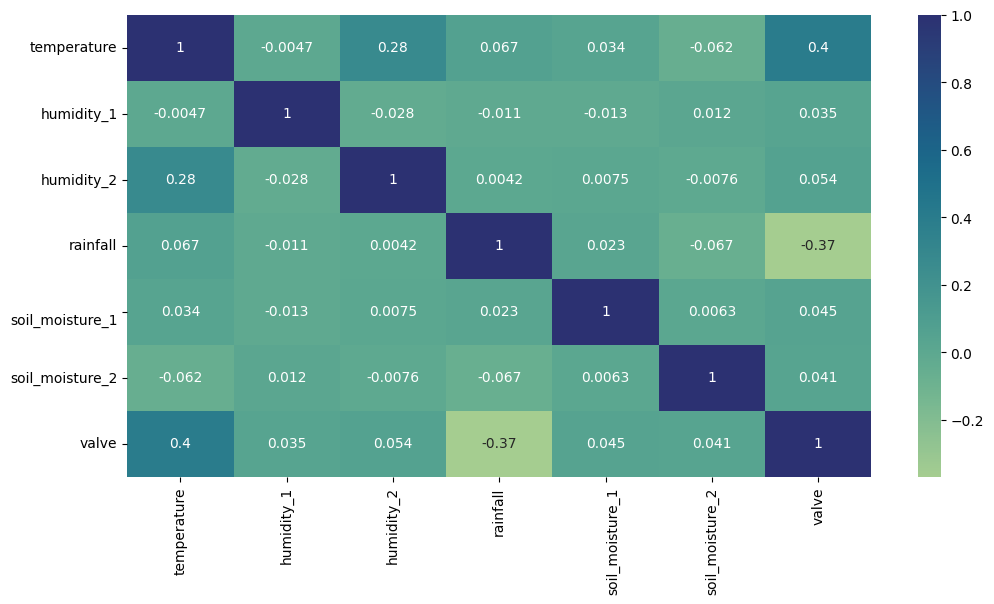

In [ ]:
figure = plt.figure(figsize=(12, 6))
sns.heatmap(data.drop(columns = 'label').corr(),annot=True, cmap="crest")

In [ ]:
label_groupby = data.groupby('label').mean().reset_index()
label_groupby


,label,temperature,humidity_1,humidity_2,rainfall,\nsoil_moisture_1,soil_moisture_2,valve
0,banana,27.376798,59.914647,80.358123,104.626980,49.928948,49.864432,0.49
1,blackgram,29.973340,60.972329,65.118426,67.884151,50.316516,50.200238,0.87
2,chickpea,18.872847,58.985923,16.860439,80.058977,49.719231,50.798751,0.39
3,coffee,25.540477,61.117096,58.869846,158.066295,49.680000,48.344816,0.52
4,cotton,23.988958,58.164552,79.843474,80.398043,49.430000,49.330000,0.48
5,grapes,23.849575,59.505572,81.875228,69.611829,50.247267,50.247456,0.43
6,jute,24.958376,60.616194,79.639864,174.792798,50.340000,50.108086,0.29
7,kidneybeans,20.115085,63.176408,21.605357,105.919778,49.533187,49.806439,0.34
8,lentil,24.509052,62.868752,64.804785,45.680454,49.856945,49.924202,0.64
9,maize,22.389204,59.352161,65.092249,84.766988,49.455061,50.413897,0.36


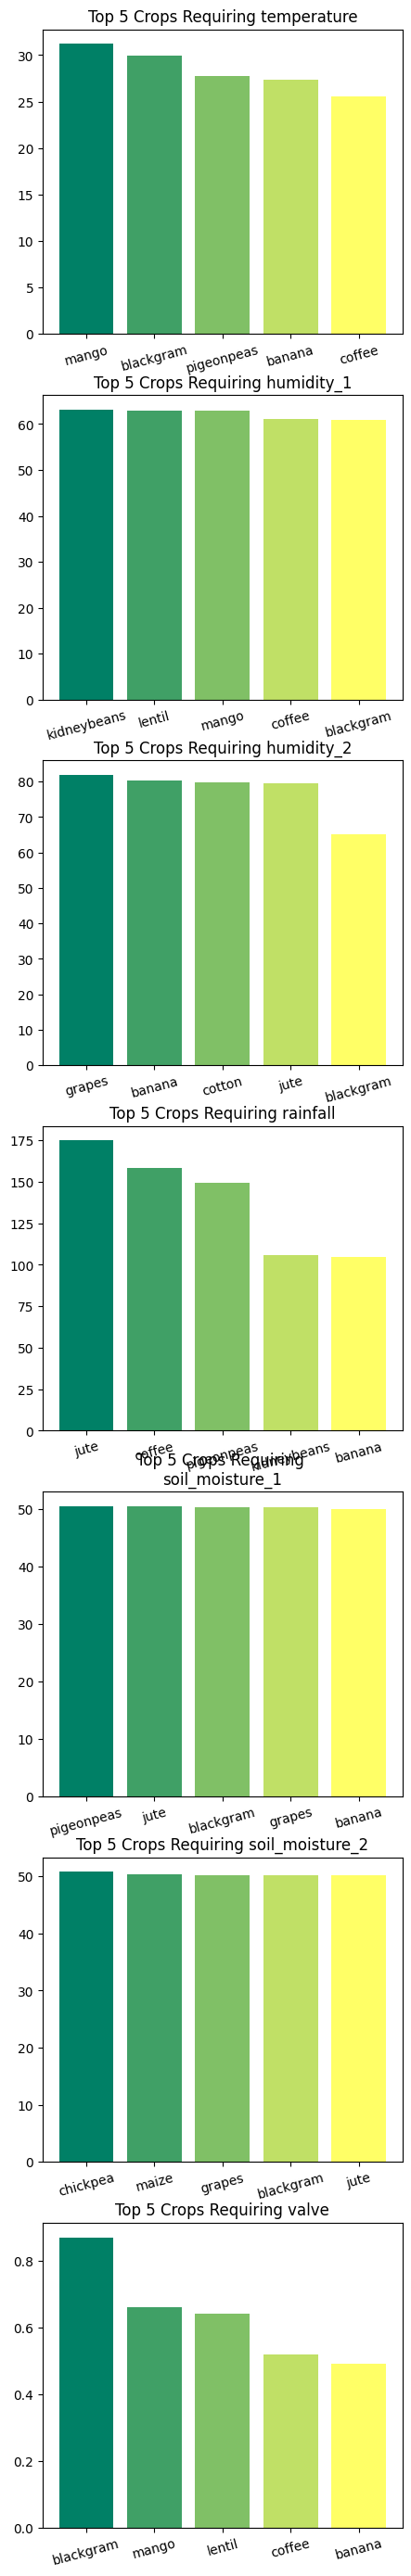

In [ ]:
import matplotlib.pyplot as plt

feature_columns = label_groupby.columns[1:]

num_rows = len(feature_columns)
num_cols = 1

colors = plt.cm.summer(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

for i, feature in enumerate(feature_columns):

    top_5_crops = label_groupby.sort_values(by=feature, ascending=False)[:5]

    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes

    ax.bar(top_5_crops['label'], top_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Top 5 Crops Requiring {feature}')

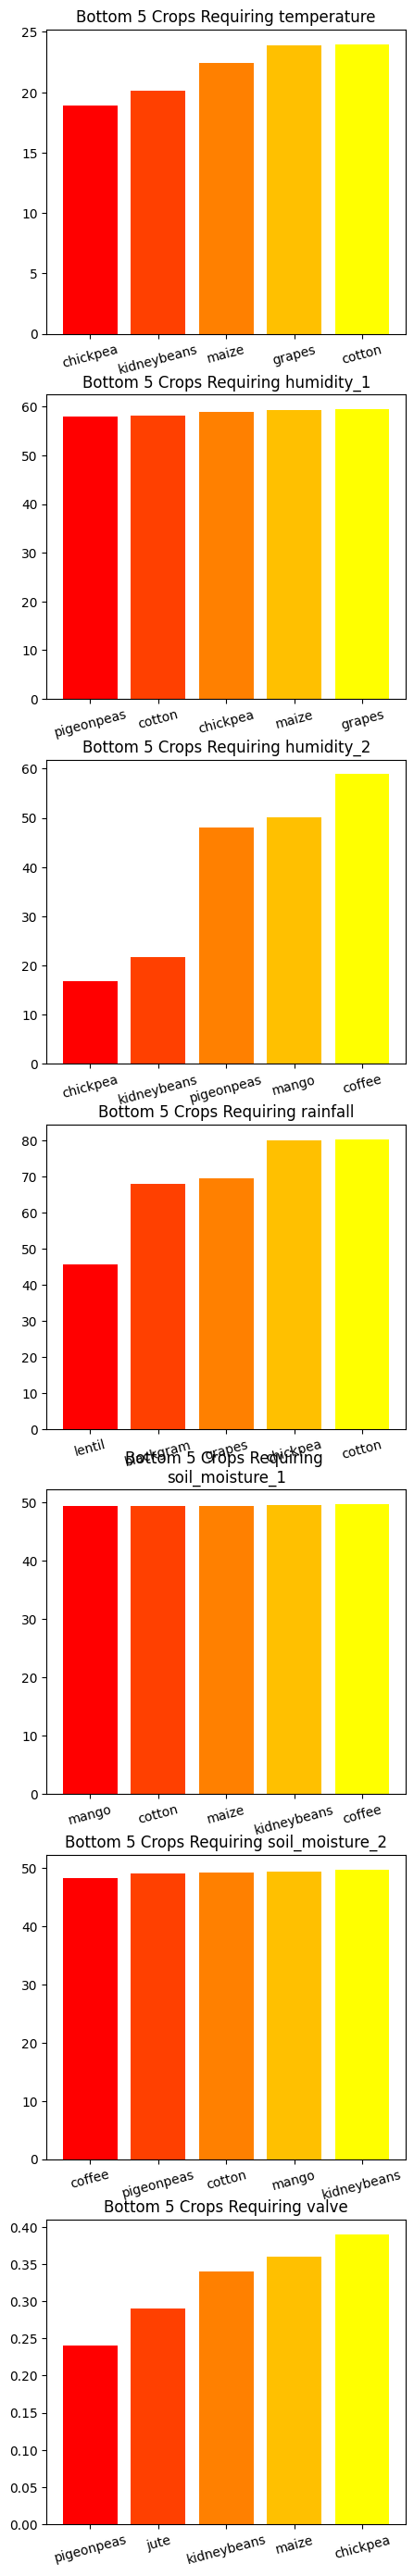

In [ ]:
import matplotlib.pyplot as plt

feature_columns = label_groupby.columns[1:]

num_rows = len(feature_columns)
num_cols = 1

colors = plt.cm.autumn(np.linspace(0, 1, 5))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 5 * num_rows))

for i, feature in enumerate(feature_columns):

    bottom_5_crops = label_groupby.sort_values(by=feature, ascending=True)[:5]

    if num_rows > 1:
        ax = axes[i]
    else:
        ax = axes

    ax.bar(bottom_5_crops['label'], bottom_5_crops[feature], color = colors)
    ax.tick_params(axis='x', rotation=15)
    ax.set_title(f'Bottom 5 Crops Requiring {feature}')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.drop('label', axis =1)
y = data['label']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

# Define empty lists to store accuracy scores and model names
acc = []
model = []

rfc = RandomForestClassifier(n_estimators=20, random_state=0)
rfc.fit(X_train, y_train)

predicted_values = rfc.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

# Append accuracy score to the acc list and 'RF' to the model list
acc.append(x)
model.append('RF')

print("RF's Accuracy is: ", x)
print(classification_report(y_test, predicted_values))


RF's Accuracy is:  0.9416666666666667
              precision    recall  f1-score   support

      banana       0.97      0.97      0.97        30
   blackgram       0.93      0.87      0.90        30
    chickpea       0.93      1.00      0.96        27
      coffee       0.88      1.00      0.94        29
      cotton       0.88      1.00      0.93        28
      grapes       1.00      0.88      0.94        33
        jute       1.00      1.00      1.00        26
 kidneybeans       1.00      0.94      0.97        35
      lentil       1.00      1.00      1.00        27
       maize       0.84      0.97      0.90        32
       mango       0.94      1.00      0.97        29
  pigeonpeas       1.00      0.74      0.85        34

    accuracy                           0.94       360
   macro avg       0.95      0.95      0.94       360
weighted avg       0.95      0.94      0.94       360



In [ ]:
import numpy as np

# Original data with 6 features
data = np.array([[26.14577, 33.42047, 71.23691, 193.1008, 49, 55]])

# Add a dummy feature with a constant value (e.g., 0)
data_with_dummy_feature = np.hstack((data, np.zeros((data.shape[0], 1))))

# Make a prediction
prediction = rfc.predict(data_with_dummy_feature)
print(prediction)


['jute']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

